In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./datasets/fraudTrain.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
df.distance

0          48.838332
1          18.773002
2          67.236235
3          59.448672
4          48.191593
             ...    
1296670    74.410630
1296671    46.667580
1296672    61.545493
1296673    52.585258
1296674    52.104318
Name: distance, Length: 1296675, dtype: float64

In [12]:
from haversine import haversine, Unit 
df['distance']=0
for i in range(df.shape[0]):
    result = haversine((df['lat'][i],df['long'][i]) , (df['merch_lat'][i], df['merch_long'][i]), unit='mi')
    df['distance'][i]= result

- index - 인덱스
- trans_date_trans_time - 트랜잭션 날짜 시간
- cc_num - 신용카드 고객 번호
- merchant - 상인 이름
- category - 상인 카테고리, 범주
- amt - 트랜잭션 양
- first - 카드 소지자의 이름
- last - 카드 소지자의 성
- gender - 신용카드 소지자의 성별
- street - 신용카드 소지자의 주소
- city - 신용카드 소지자의 도시
- state - 신용카드 소지자의 주
- zip - 신용카드 소지자의 zip코드
- lat - 신용카드 소지자의 위도 
- long - 신용카드 소지자의 경도
- city_pop - 신용카드 소지자의 도시인구
- job - 신용카드 소지자의 직업
- dob - 신용카드 소지자의 생년월일
- trans_num - 트랜잭션 번호
- unix_time - Unix 트랜잭션 시간
- merch_lat - 상인의 위도 위치
- merch_long - 상인의 경도 위치
- is_fraud - 이상거래  <--- Target Class

In [61]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [63]:
df.isna().sum().sum()

0

In [35]:
## 각 변수의 분포 시각화
df.plot(kind='density', subplots=True, layout=(6,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(16,24))
plt.show()

In [64]:
# trans_num 특별한 값을 나타내지 않는 컬럼으로 보여짐
# 성 이름 컬럼 삭제 cc_num변수를 고유식별자로 사용할 수있기때문
print(df['trans_num'].value_counts())
df = df.drop("trans_num",axis=1)
df = df.drop(['first','last'],axis=1)


0b242abb623afc578575680df30655b9    1
c85864e7e7cf0be6d1b8597977b8afea    1
1a8a2a05638a5503cc6bb8d5735efcc1    1
4556eaf1f7def06eb500325cde4d054e    1
5e915d9f88bd09cee9655a470d9bc0bd    1
                                   ..
2d1aa5b21a993788ac19b697598ca44c    1
b50dd4b47d1ad877874661afba6eb7f6    1
5ce4e974bf15b7d9f133c6eedb81ceb1    1
64d601ddeaf4eba8b191bd1859998209    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: trans_num, Length: 1296675, dtype: int64


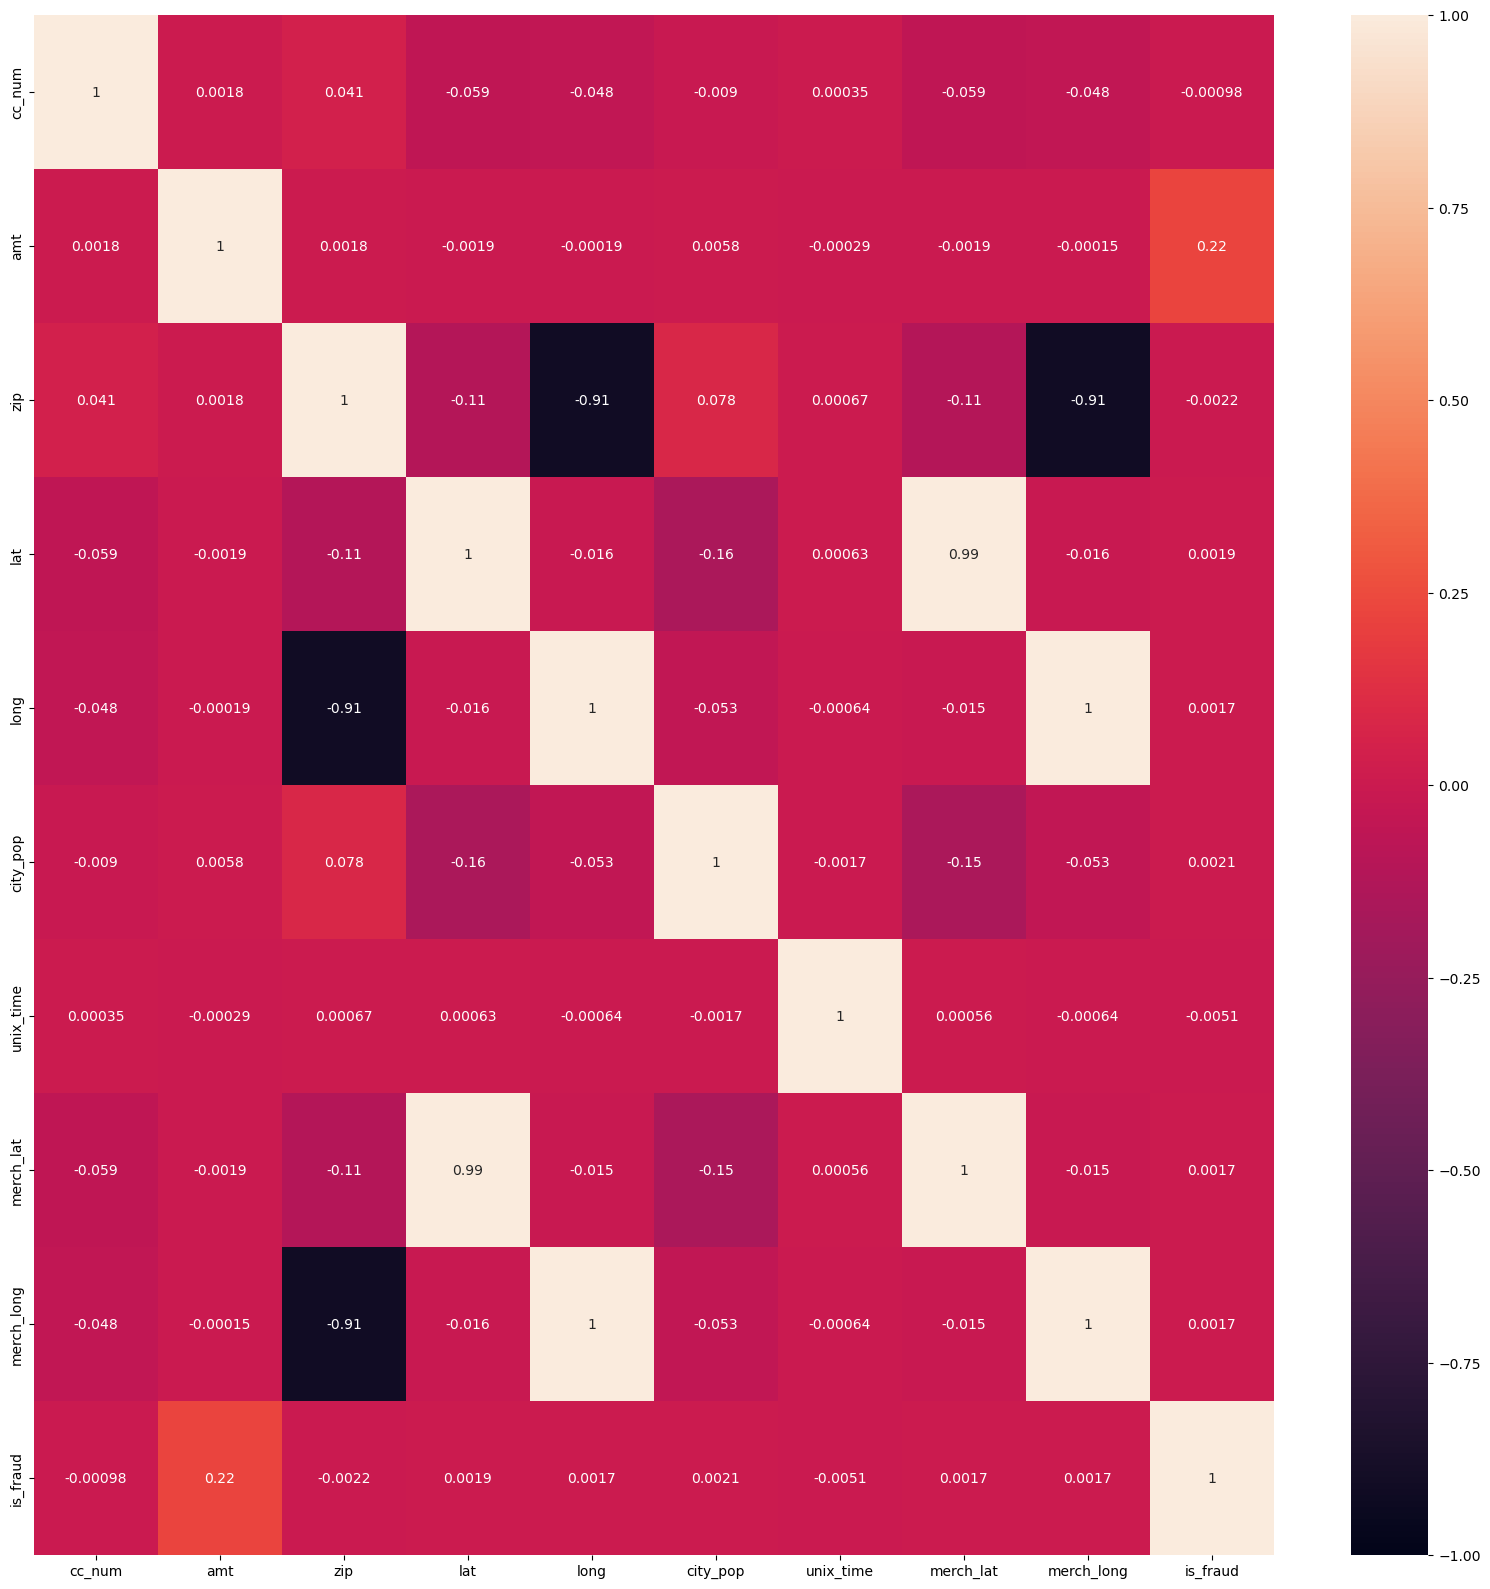

In [65]:
# 상관계수가 높은 변수 확인
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

## 상인과 소비자의 위도 경도 변수를 차이로 하여 새로운 변수 생성

df["lat_diff"] = abs(df['lat'] - df['merch_lat'])
df["long_diff"] = abs(df["long"] - df["merch_long"])
df.drop(['lat','merch_lat','long','merch_long'],axis=1,inplace=True)

## 위도 차이와 경도차이를 이용하여 거리변수를 생성
## 유클리디안 거리를 통해 거리 변수를 새로 만들어주었습니다
df['distance'] =  np.sqrt(pow(df["lat_diff"],2) + pow(df["long_diff"],2))
df.drop(['long_diff','lat_diff'],axis=1,inplace=True)


In [66]:
# trans_date_trans_time : 트랜잭션 날짜 시간, dob : 신용카드 소지자의 생년월일
# 둘의 차이를 이용해 나이 계산
date_test = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d').dt.strftime('%Y').astype(int)
date_test2 = pd.to_datetime(df['dob'], format='%Y-%m-%d').dt.strftime('%Y').astype(int)
df['age'] = date_test - date_test2
## dob 변수 제거
df.drop('dob',axis=1,inplace=True)

In [69]:
### 같은 카드에서 다음 거래까지 걸린 시간의 차이를 단위(초)로 하여 나타냄
df["recency"] = df.groupby(by="cc_num")["unix_time"].diff()
print(df['recency'].value_counts())
df['recency'].fillna(0,inplace=True)  # 첫 거래에 있는 na값은 0으로 처리
df.drop("unix_time",1,inplace=True)

KeyError: 'Column not found: unix_time'

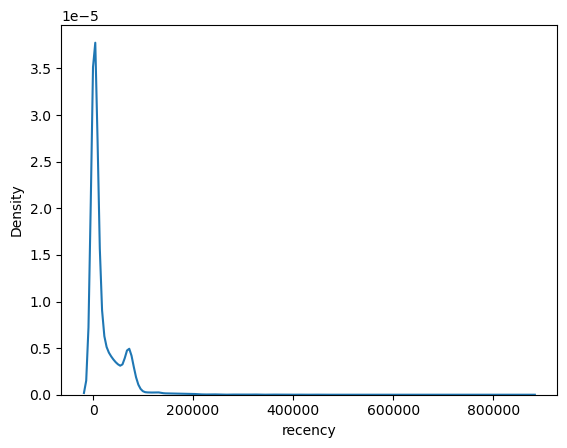

 recency 값이 0 각 카드로 처음 거래되었을때 이상거래로 확인된 비율 7.477567298105684 %


In [74]:
## recency 값을 그룹화 하여 0이아닌 값에서
## 이상거래가 존재함을 확인 할 수 있다.
sns.kdeplot(df[df['is_fraud']==1]['recency'])
plt.show()

# 첫거래에서는 무조건 recency 값이 0으로 나오기 때문에 이때 이상값을 발견해낼수 있을지 의문이 듦
# recency 값이 0 각 카드로 처음 거래되었을때 이상거래로 확인된 비율
ratio = df[(df['is_fraud']==1) & (df['recency']==0)]["is_fraud"].sum()/len(df[df["recency"]==0]["is_fraud"])*100
print(f' recency 값이 0 각 카드로 처음 거래되었을때 이상거래로 확인된 비율 {ratio} %')

In [75]:
# street , city, city_pop,state, zip 변수는 지역을 나타내는 변수로 이 지역의 규모를 범주화하여 변수를 만듬
# 대도시는 인구 50만명 이상, 중소도시는 10만명 이상에서 50만명 이하, 소도시는 10만명 이하로 구분하고 있다.
# 변수의 단위가 10으로 되어있음
df.loc[(df["city_pop"]<10000),["city_pop_category"]] = "소도시"
df.loc[((df["city_pop"]>10000) & (df["city_pop"]<50000)),["city_pop_category"]] = "중소도시"
df.loc[(df["city_pop"]>50000),["city_pop_category"]] = "대도시"

df.drop(['city','city_pop','street','zip'],axis=1,inplace=True)
df['city_pop_category'].value_counts()

소도시     907611
대도시     242674
중소도시    146390
Name: city_pop_category, dtype: int64

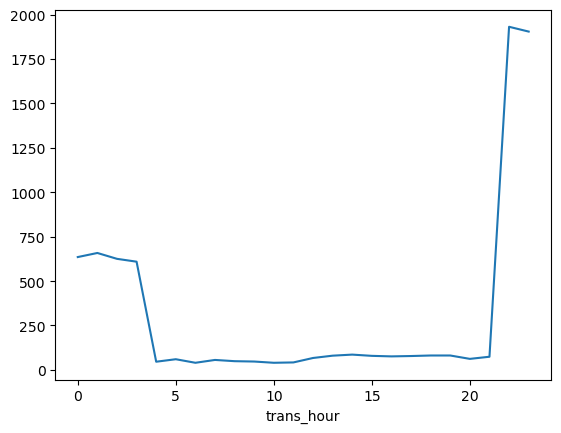

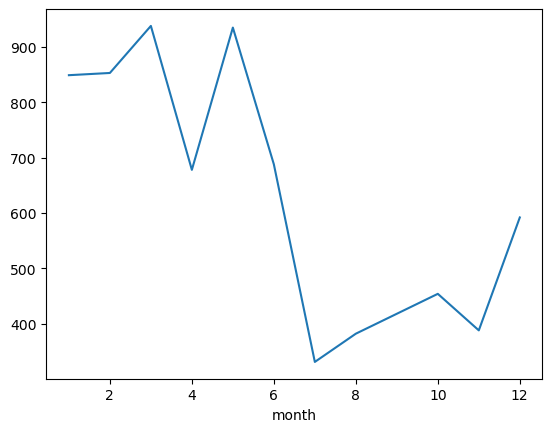

In [76]:
## trans_date_trans_time 변수는 이 데이터 셋 자체가 과거의 데이터기 때문에 중요한 변수는 아닐것이라 생각한다
## 그러나 월별 ,시간 대 는 중요한 요소가 될수 있을것 같다.

## 거래 시간을 새 파생변수 'trans_hour'로 만든 후 시간 별 이상거래 확인 
df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.strftime('%H').astype(int)

# 21pm ~ 6am (12시간) 동안 많은 이상치가 발생하여 21pm ~ 6am을 '밤', 그 외의 시간을 '아침'으로 범주화 한 
df[df['is_fraud']==1].groupby('trans_hour')['is_fraud'].count().plot()
plt.show()

#새 파생변수 'trans_hour_category' 생성
df.loc[(df['trans_hour']>=7) & (df['trans_hour']<=20),'trans_hour_category'] = '아침'
df.loc[(df['trans_hour']>=21) | (df['trans_hour']<=6),'trans_hour_category'] = '밤'
df['trans_hour_category']



# 새로운 파생변수 month / trans_date_trans_time 시계열로 변경 후 월만 int형으로 출력
df['month'] = pd.to_datetime(df['trans_date_trans_time']).dt.strftime('%m').astype(int)

# 그래프 그리기
df[df['is_fraud']==1].groupby('month')['is_fraud'].count().plot()
plt.show()
# 데이터프래임으로 확인
df[df['is_fraud']==1].groupby('month')[['is_fraud']].count()

# 데이터 변경 함수
def change(x):
    if x < 6:
        result = '상반기'
    else:
        result = '하반기'
    return result

# 새로운 파생변수 half_month 1~6월 :상반기 7~12월 : 하반기
df['trans_month_category'] = df['month'].apply(change)


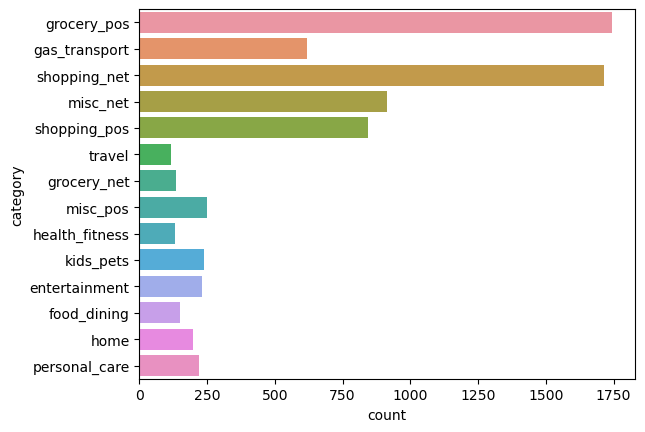

AttributeError: 'DataFrame' object has no attribute 'trans_hour'

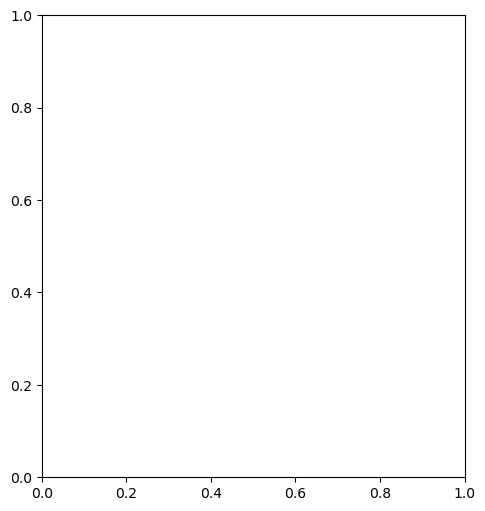

In [80]:
## category 별 이상거래 횟수 확인

is_fraud = df[df["is_fraud"]==1]
sns.countplot(y=is_fraud.category)
plt.show()

##위 의 그래프에서 grocery_pos 와 shopping_net 목록에서 이상거래가 많이 발생한 것을 확인
## offlince grocery에서는 새벽시간 internet shopping 에는 밤시간에 이상거래로 관측된다
plt.figure(figsize=[12,6])
plt.subplot(121)
sns.kdeplot(x=is_fraud[is_fraud.category == "grocery_pos"].trans_hour)
plt.xlim(left=0,right=24)
plt.title(label = "Offline Grocery Transactions Frauds")
plt.subplot(122)
sns.kdeplot(x=is_fraud[is_fraud.category == "shopping_net"].trans_hour)
plt.title(label = "Internet Shopping Transactions Frauds")
plt.xlim(left=0,right=24)
plt.show()

In [58]:
# 기존 month 컬럼 삭제
df.drop(['month','trans_hour','trans_date_trans_time'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   job                    1296675 non-null  object 
 7   is_fraud               1296675 non-null  int64  
 8   distance               1296675 non-null  float64
 9   age                    1296675 non-null  int32  
 10  recency                1296675 non-null  float64
 11  city_pop_category      1296675 non-null  object 
 12  trans_hour             1296675 non-null  int32  
 13  trans_hour_category    1296675 non-null  object 
 14  month             

In [81]:
df.info()
## jop state category merchat 변수 처리 계획

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   cc_num                1296675 non-null  int64  
 1   merchant              1296675 non-null  object 
 2   category              1296675 non-null  object 
 3   amt                   1296675 non-null  float64
 4   gender                1296675 non-null  object 
 5   state                 1296675 non-null  object 
 6   job                   1296675 non-null  object 
 7   is_fraud              1296675 non-null  int64  
 8   distance              1296675 non-null  float64
 9   age                   1296675 non-null  int32  
 10  recency               1296675 non-null  float64
 11  city_pop_category     1296675 non-null  object 
 12  trans_hour_category   1296675 non-null  object 
 13  trans_month_category  1296675 non-null  object 
dtypes: float64(3), int32(1), int64(2),

<AxesSubplot:>

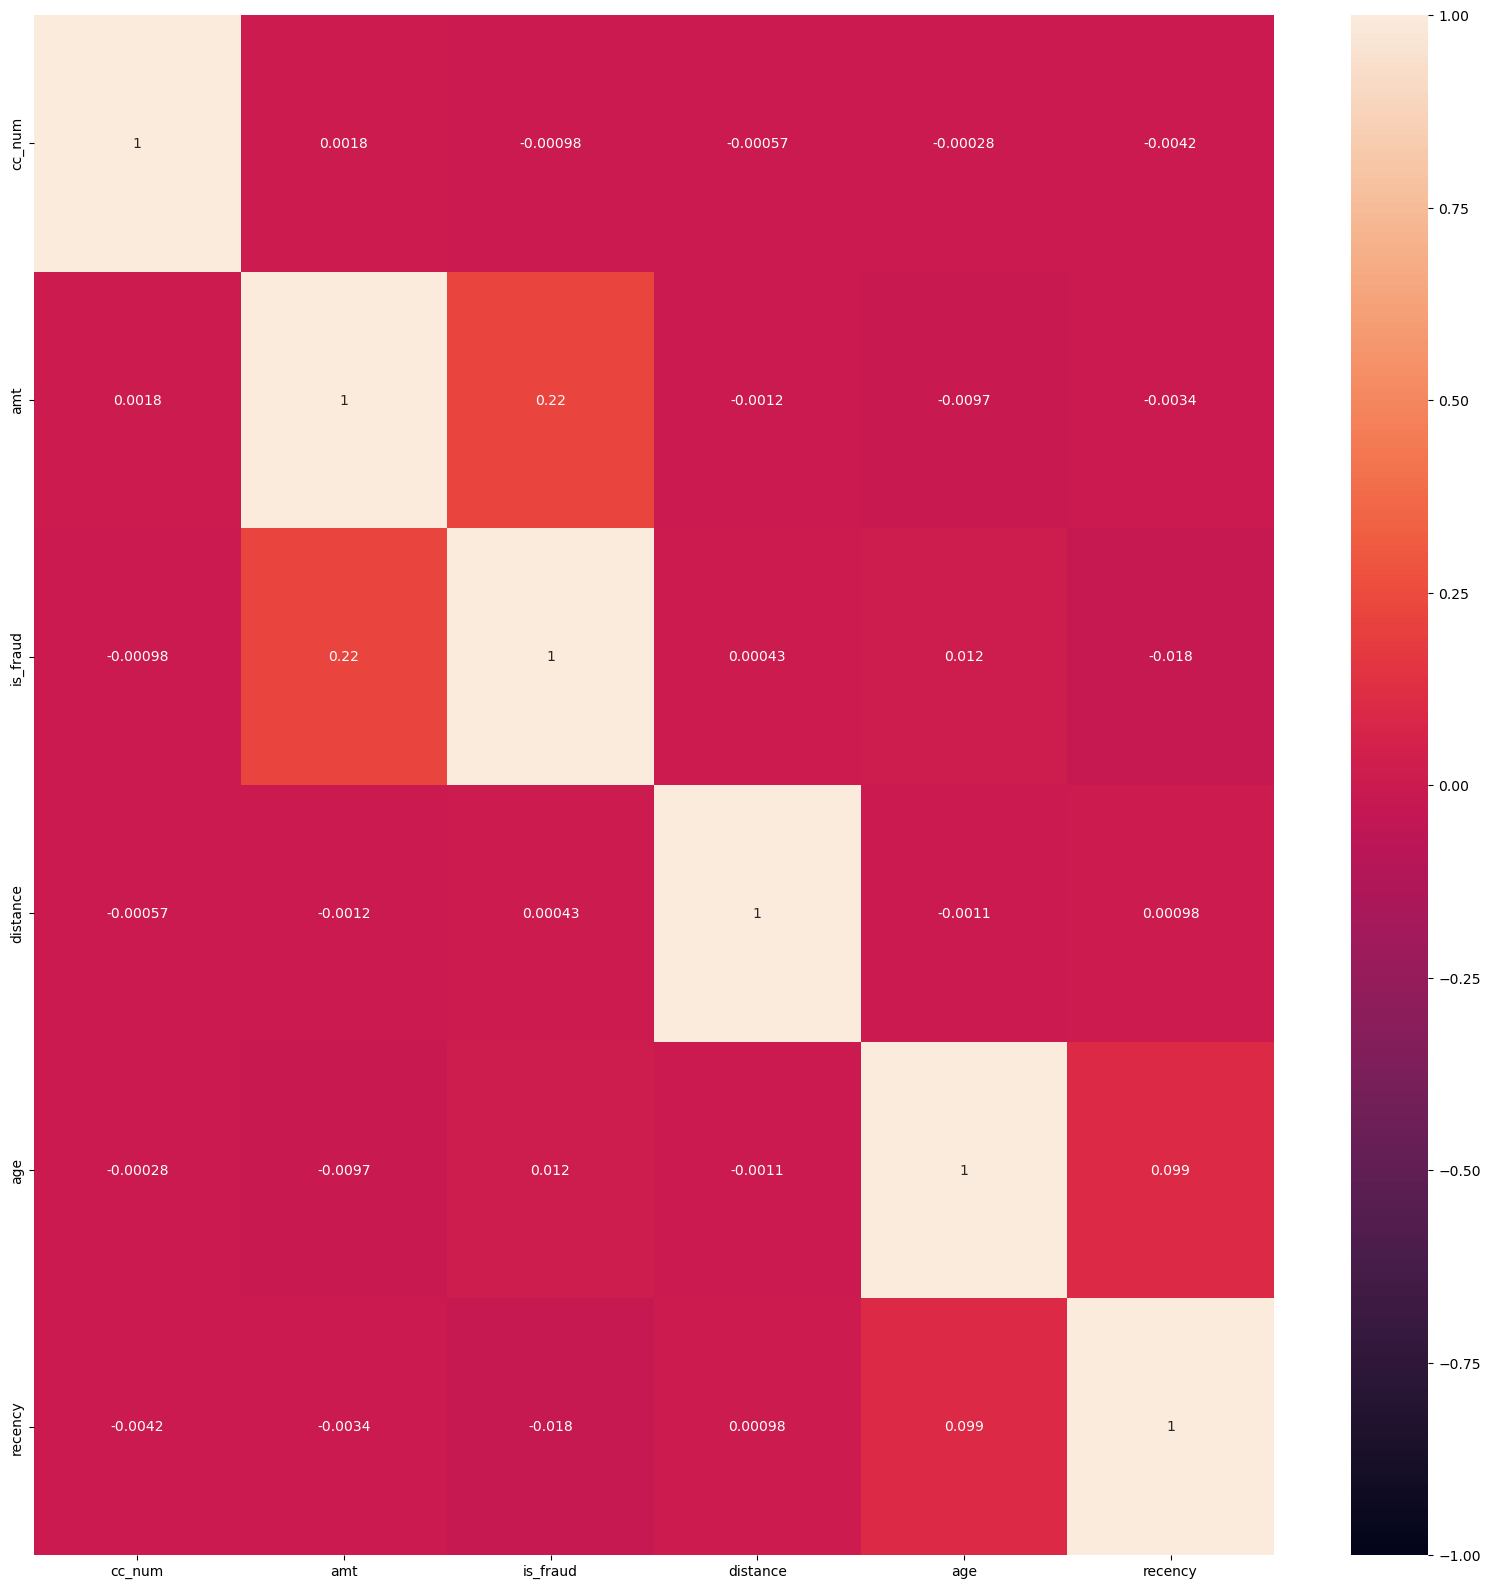

In [82]:
# 상관계수가 높은 변수 확인
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

In [83]:
df.describe()

,cc_num,amt,is_fraud,distance,age,recency
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,5.788652e-03,7.656611e-01,4.602930e+01,3.246039e+04
std,1.308806e+18,1.603160e+02,7.586269e-02,2.847484e-01,1.738237e+01,4.733114e+04
min,6.041621e+10,1.000000e+00,0.000000e+00,2.386629e-04,1.400000e+01,0.000000e+00
25%,1.800429e+14,9.650000e+00,0.000000e+00,5.649579e-01,3.300000e+01,6.004000e+03
50%,3.521417e+15,4.752000e+01,0.000000e+00,7.983111e-01,4.400000e+01,1.656300e+04
75%,4.642255e+15,8.314000e+01,0.000000e+00,9.775357e-01,5.700000e+01,4.023900e+04
max,4.992346e+18,2.894890e+04,1.000000e+00,1.413364e+00,9.600000e+01,1.341471e+06
